We all know that the amount of calories we burn is all dependent on the number of physical movements and exercises we do. In this article, I will take you through a very simple Machine Learning task on Calories Burned Prediction with Python programming language.

In [11]:
import numpy as np #linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import scipy
#import PyMC3 as pm

Now let’s read the datasets and merge them for further analysis:

In [12]:
exercise = pd.read_csv('exercise.csv')
calories = pd.read_csv('calories.csv')
df = pd.merge(exercise, calories, on = 'User_ID')
df = df[df['Calories']< 300]
df = df.reset_index()
df['Intercept'] = 1
df.head()

,index,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories,Intercept
0,0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0,1
1,1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0,1
2,2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0,1
3,3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0,1
4,4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0,1


Now let’s visualize the dataset to see what we are going to work with in terms of Calories burned vs Duration of Exercise:

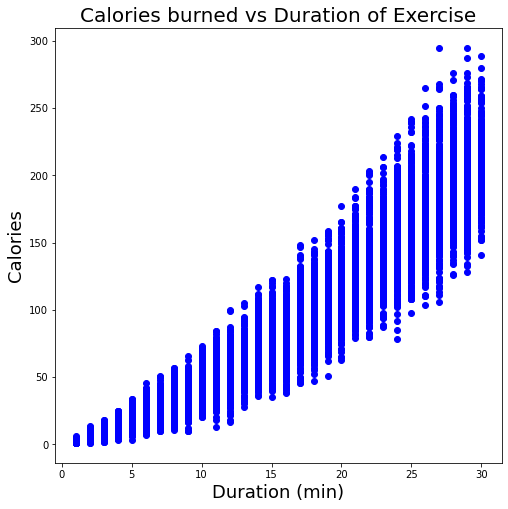

In [13]:
plt.figure(figsize=(8,8))
plt.plot(df['Duration'],df['Calories'],'bo');
plt.xlabel('Duration (min)',size = 18); plt.ylabel('Calories', size = 18);
plt.title('Calories burned vs Duration of Exercise', size = 20);

Now we need to create the features and a response:

In [17]:
x = df.loc[:,['Intercept','Duration']]
y = df.loc[:,'Calories']

let’s do the train_test_split

In [18]:
from sklearn.model_selection import train_test_split

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
reg = LinearRegression()

In [23]:
reg.fit(x_train,y_train)

LinearRegression()

In [24]:
reg.score(x_test,y_test)

0.9127565443594695

In [25]:
pred = reg.predict(x_test)

In [28]:
from sklearn import metrics

In [29]:
metrics.mean_squared_error(y_test,pred)


335.6563584197786

C:\Users\ADMIN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Calories'>

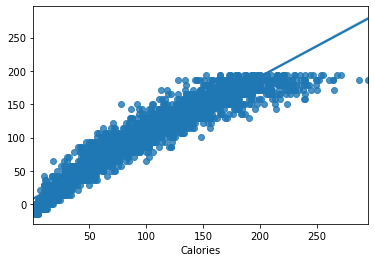

In [30]:
sns.regplot(y_test,pred)

In [31]:
reg.coef_

array([0.        , 7.17988652])

In [32]:
reg.intercept_

-21.91675592768638